In [184]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import json
import pandas as pd
import random
from cfde import Simple_CF_Descent

%load_ext autoreload
%autoreload 2 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Naive CF-Descent

This file contains the initial attempts at making CF-Descent work and tests to see it's validity

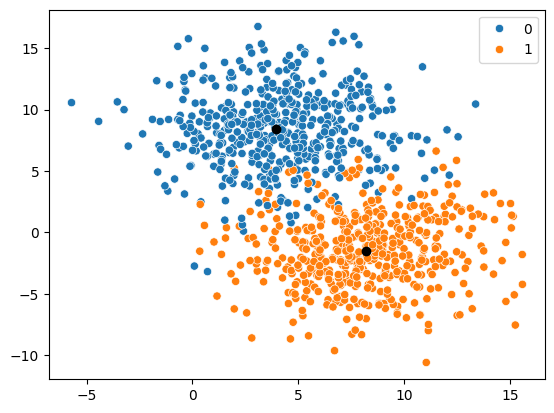

In [185]:
X, y, centers = make_blobs(centers=2, cluster_std=3, n_features=2, n_samples=1000, return_centers=True)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.scatter(x=centers[0][0], y=centers[0][1],color="black")
plt.scatter(x=centers[1][0], y=centers[1][1],color="black")

In [186]:
model = RandomForestClassifier()
model.fit(X, y)
pred = model.predict(X)
pred = [str(l) for l in pred]
stacked = np.column_stack((X, pred))
df = pd.DataFrame(stacked, columns=[f'x{i+1}' for i in range(X.shape[1])]+['label'], dtype=float)
df

,x1,x2,label
0,9.805438,-1.005753,1.0
1,4.091505,11.550025,0.0
2,8.234315,2.264548,1.0
3,8.899714,-4.811566,1.0
4,9.392884,10.753075,0.0
...,...,...,...
995,1.860566,8.803679,0.0
996,11.517605,6.623920,1.0
997,6.030074,-1.424366,1.0
998,4.848604,-0.597807,1.0


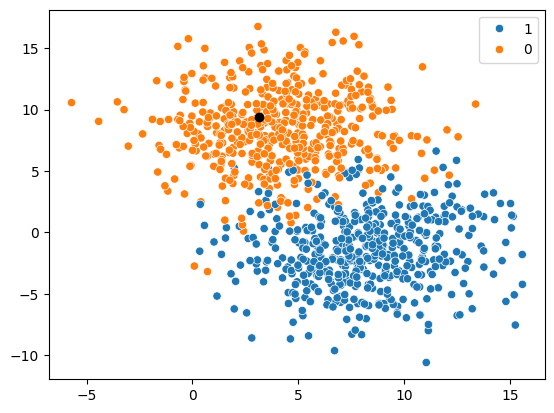

In [187]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pred)
plt.scatter(x=df.values[5][0],y=df.values[5][1],color='black')

In [188]:
x,cf,h = Simple_CF_Descent(df=df, target=1.0, centers=centers)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


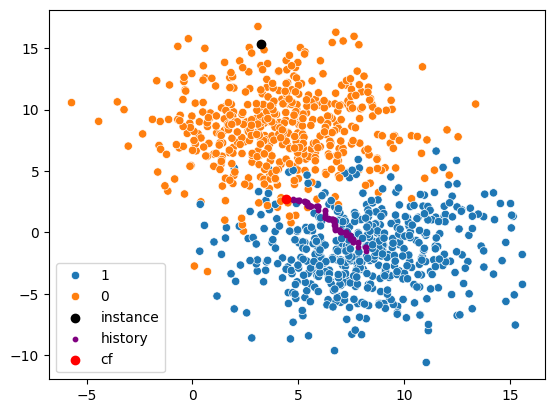

In [189]:
hx = list(zip(*h))[0]
hy = list(zip(*h))[1]
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pred)
plt.scatter(x=x[0],y=x[1],color='black',label='instance')
plt.scatter(x=hx, y=hy, color='purple', label='history',s=10)
plt.scatter(x=cf[0],y=cf[1],color='red', label='cf')
plt.legend()

## PCA attempt

<Axes: >

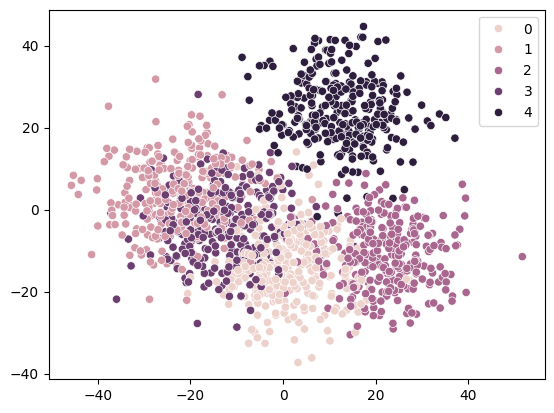

In [190]:
X, y, centers = make_blobs(centers=5, cluster_std=8, n_features=30, n_samples=1500, return_centers=True)

pca = PCA(n_components=2)
embed_X = pca.fit_transform(X)
sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=y)

In [191]:
model = RandomForestClassifier()
model.fit(X, y)
pred = model.predict(X)
pred = [str(l) for l in pred]
stacked = np.column_stack((X, pred))
df = pd.DataFrame(stacked, columns=[f'x{i+1}' for i in range(X.shape[1])]+['label'], dtype=float)
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x22,x23,x24,x25,x26,x27,x28,x29,x30,label
0,-10.652267,-6.199429,-15.099167,0.776590,5.313265,4.651995,-6.880363,4.040721,-7.792335,9.465104,...,-9.909801,-14.276842,10.063681,-0.102005,-21.940885,-0.355144,4.724214,-10.321855,1.617697,1.0
1,-13.194068,-14.434927,10.612292,6.648352,12.849352,0.529441,2.748049,2.143454,-15.261177,-12.995633,...,10.773155,-4.084320,2.748403,5.238812,-6.417163,-6.773802,3.937315,-4.935920,5.224970,1.0
2,-18.455552,-8.620512,6.374499,14.295744,-13.905723,-6.249646,4.991251,-0.415099,-9.285349,13.873329,...,-8.916112,-4.974655,-8.246180,10.287177,-1.297620,-22.002334,-2.222701,4.473859,-19.169184,2.0
3,-11.569223,-11.765747,-19.045493,-1.312822,3.490244,-7.574590,-3.487330,7.229633,-3.772277,6.470577,...,-15.091652,0.445878,-6.390391,-9.631030,13.024694,4.054746,29.226239,9.655009,-0.607007,0.0
4,12.004909,-9.428748,2.248862,-6.526248,10.155917,-9.981245,28.286596,-3.515459,0.677053,22.420241,...,15.849383,-9.145096,12.588263,-2.854939,-14.292520,25.972011,0.099740,-13.312826,0.028460,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-11.973689,-0.586857,-7.957610,-17.660950,12.236794,-4.384247,8.140585,-2.480446,-4.262828,3.222179,...,-4.139979,10.772754,-6.905964,14.163482,-8.114238,11.594087,15.908736,4.717354,4.986814,0.0
1496,-12.415510,1.698913,7.873841,18.705790,-12.571343,12.034845,0.624969,-9.140382,-9.130180,8.552202,...,-5.124831,8.458421,-12.700691,24.935386,2.580484,-9.122537,-11.076246,1.400016,-0.994512,2.0
1497,6.192410,-6.449403,-7.373343,-1.026213,12.246760,-11.110255,3.355631,-7.253972,-11.670023,-6.171164,...,-6.793270,-14.928089,1.668466,8.789038,-1.712349,4.493646,7.170211,11.776828,-1.195397,3.0
1498,-8.948344,-12.756130,-18.253337,13.687661,14.626772,16.869694,17.586952,-0.503970,-2.484153,-10.184816,...,-20.134954,-6.958769,2.272493,9.529918,-11.236887,-8.092544,1.560375,-18.312529,9.791310,1.0


In [192]:
x,cf,h = Simple_CF_Descent(df=df, target=1.0, centers=centers)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [193]:
cf_pca = pca.transform([cf])[0]

h_pca = pca.transform(h)

hx = list(zip(*h_pca))[0]
hy = list(zip(*h_pca))[1]

x_pca = pca.transform([x])[0]

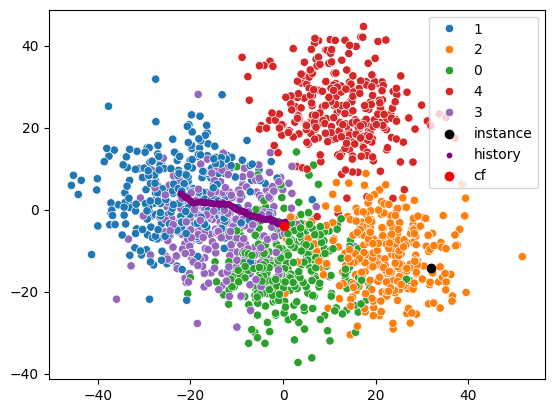

In [194]:

sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=pred)
plt.scatter(x=x_pca[0],y=x_pca[1],color='black',label='instance')
plt.scatter(x=hx, y=hy, color='purple', label='history',s=10)
plt.scatter(x=cf_pca[0],y=cf_pca[1],color='red', label='cf')
plt.legend()